In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time
import webscraping

### Let's take a look at the top teams in the English Premier League (EPL)

In [2]:
#data collection
webscraping.get_premTopGoals()

In [3]:
#data cleaning
df = pd.read_csv("premTopGoals.csv")
df = df.head(n=6)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(6):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
print(df)

               Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0    ManchesterCity     30     79       56            206          530   
1         Liverpool     30     68       37            187          450   
2           Arsenal     30     63       46            143          373   
3  ManchesterUnited     30     58       35            189          417   
4  TottenhamHotspur     30     57       38            159          401   
5           Chelsea     29     50       40            153          456   

   Goals/Game  
0    2.633333  
1    2.266667  
2    2.100000  
3    1.933333  
4    1.900000  
5    1.724138  


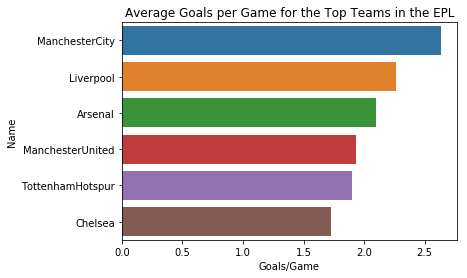

In [4]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in the EPL')
plt.show()

In [5]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(6):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

               Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0    ManchesterCity     30     79       56            206          530   
1         Liverpool     30     68       37            187          450   
2           Arsenal     30     63       46            143          373   
3  ManchesterUnited     30     58       35            189          417   
4  TottenhamHotspur     30     57       38            159          401   
5           Chelsea     29     50       40            153          456   

   Goals/Game  Shooting Accuracy(%)  Conversion Rate(%)  
0    2.633333             38.867925           38.349515  
1    2.266667             41.555556           36.363636  
2    2.100000             38.337802           44.055944  
3    1.933333             45.323741           30.687831  
4    1.900000             39.650873           35.849057  
5    1.724138             33.552632           32.679739  


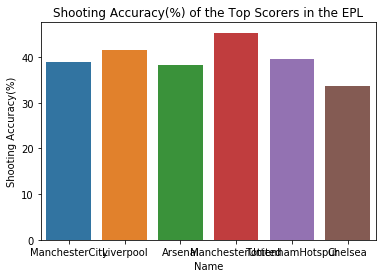

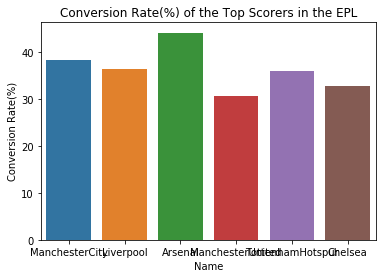

In [6]:
#visualization of top scorers' shooting accuracy and conversion rate
#df2 = df.sort_values(['Shooting Accuracy(%)'])
bar2 = sns.barplot(x='Name', y='Shooting Accuracy(%)', data=df)
plt.title('Shooting Accuracy(%) of the Top Scorers in the EPL')
plt.show()

#df3 = df.sort_values(['Conversion Rate(%)'])
bar3 = sns.barplot(x='Name', y='Conversion Rate(%)', data=df)
plt.title('Conversion Rate(%) of the Top Scorers in the EPL')
plt.show()